In [531]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [532]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [533]:
filepath = '/content/gdrive/My Drive/capstone_design_yoon/'

# 데이터 로드

In [534]:
data = pd.read_csv(filepath + 'Reviews.csv')
print('전체 리뷰 개수 :', (len(data)))

전체 리뷰 개수 : 568454


In [535]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [536]:
#리뷰 원문과 요약문 출력
data = data[['Text', 'Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [537]:
data.sample(10)

,Text,Summary
11214,I could live off of these! I'm not kidding. Th...,Yes!!!
222079,I found this product in a local grocery store ...,Tropical Trail Mix
251082,My young son is taking Chinese in school and w...,Great Gummies!
317731,I love Grove Square Spiced Apple Cider Cups (s...,I'm addicted to this!
404652,This is probably my shortest review but there'...,"Tastes Eh, Very Expensive"
483320,This is a great instant ginger product. I mix...,Very Good
435467,I have another pumpkin eating dog (it really h...,Pleasant Surprise
322422,To my knowledge Late july has been one of the ...,"Great for Students, but not the best organic c..."
496171,If you love nuts and want something truly natu...,My KIND of bar
427084,(This review is for the white can with the gol...,Like Battery Acid


# 데이터 정제

In [538]:
#데이터 중복 제거1
print('Text 열에서 중복 제거 후 데이터 수 : ', data['Text'].nunique())
print('Summary 열에서 중복 제거 후 데이터 수: ', data['Summary'].nunique())

Text 열에서 중복 제거 후 데이터 수 :  393579
Summary 열에서 중복 제거 후 데이터 수:  295742


In [539]:
#데이터 중복 제거2
data.drop_duplicates(subset=['Text'], inplace=True)
print("전체 데이터 수 :", len(data))

전체 데이터 수 : 393579


In [540]:
#null값 있는지 확인
print(data.isnull().sum())

Text       0
Summary    3
dtype: int64


In [541]:
#summary에 존재하는 null값 제거
data.dropna(axis=0, inplace=True)
print('전체 데이터 수 :', (len(data)))

전체 데이터 수 : 393576


In [542]:
#단어 정규화 및 불용어 제거
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [543]:
#NLTK의 불용어
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print('불용어 개수 :', len(stop_words))
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
불용어 개수 : 179
{'re', 'very', 'these', 'have', 'as', "hadn't", 'below', "doesn't", 'myself', 'before', 'not', 'mustn', 'again', 'whom', "that'll", 'no', "needn't", 'did', 'those', 'but', 'so', 'most', 'too', 'themselves', "wasn't", 'into', "mustn't", 'for', 'ours', 'be', 'll', "should've", 'in', 'she', 'both', 'm', 'ourselves', 'doing', 'does', 'any', 'couldn', 'was', 'them', 'they', 'which', "haven't", 'him', 'from', 'more', 'some', 'then', 'shan', 'once', 'each', 'you', 'had', 'against', 'all', 'few', 'aren', 'wouldn', 'his', 'their', "you've", 'is', 'between', 'to', 'above', 'that', 'weren', 'himself', "won't", 'were', 'when', 'here', 'been', 'up', 'now', 'doesn', 'nor', "shan't", "she's", "it's", 'while', 'what', "you're", 'an', 'yourself', "hasn't", 'by', 'of', 'on', 'hasn', 'will', 'because', 'about', 'same', "weren't", 'yours', 'if', 'needn', 'ain', 'under', 'furt

In [544]:
#전처리 함수 설계
def preprocess_sentence(sentence, remove_stopwords = True):
    sentence = sentence.lower() #텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text #html 태그 제거
    sentence = re.sub(r'\([^)]*\)',  '', sentence) #괄호로 닫힌 문자열 제거 Ex) my husband (and myself) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stop_words if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [545]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'
print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, 0))

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


In [546]:
# Text 열 전처리
clean_text = []
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))
clean_text[:5]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']

In [547]:
# Summary 열 전처리
clean_summary = []
for s in data['Summary']:
    clean_summary.append(preprocess_sentence(s, 0))
clean_summary[:5]


/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.amazon.com/gp/product/b000v9lq30/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/u

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy']

In [548]:
#전처리 결과 저장
data['Text'] = clean_text
data['Summary'] = clean_summary


In [549]:
# 길이가 공백인 샘플은 NULL 값으로 변환
data.replace('', np.nan, inplace=True)
print(data.isnull().sum())

Text         3
Summary    350
dtype: int64


In [550]:
# summary 열 샘플 null값 제거 -> 전체 샘플 수 확인
data.dropna(axis = 0, inplace = True)
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 393224


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 1919
텍스트의 평균 길이 : 38.02456869367078
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 3.960066018350864


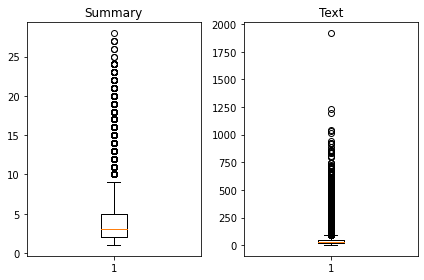

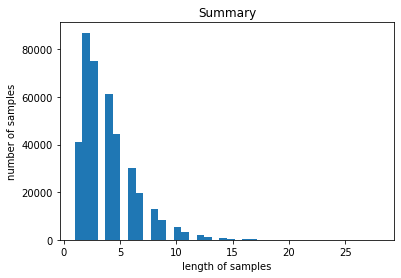

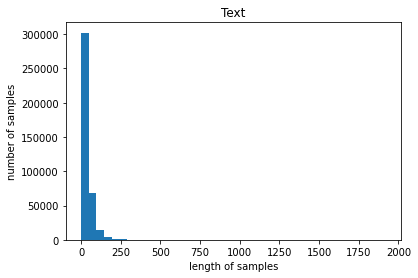

In [551]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [628]:
text_max_len = 60
summary_max_len = 6

In [619]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [620]:
below_threshold_len(text_max_len, data['Text'])

전체 샘플 중 길이가 2089 이하인 샘플의 비율: 1.0


In [621]:
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 6 이하인 샘플의 비율: 1.0


In [622]:
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 294998


In [557]:
data.head()

,Text,Summary
0,bought several vitality canned dog food produc...,good quality dog food
1,product arrived labeled jumbo salted peanuts p...,not as advertised
2,confection around centuries light pillowy citr...,delight says it all
3,looking secret ingredient robitussin believe f...,cough medicine
4,great taffy great price wide assortment yummy ...,great taffy


In [558]:
# 요약 데이터 시작 토큰과 종료 토큰을 추가
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [559]:
encoder_input = np.array(data['Text'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [560]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[167898  43687  91313 ... 194310  34705 212692]


In [561]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

tokenizer_su = Tokenizer()
tokenizer_su.fit_on_texts(decoder_input)
tokenizer_su.fit_on_texts(decoder_target)

In [562]:
su_to_index = tokenizer_su.word_index
index_to_su = tokenizer_su.index_word

In [563]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 58999


In [564]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [565]:
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 235999
훈련 레이블의 개수 : 235999
테스트 데이터의 개수 : 58999
테스트 레이블의 개수 : 58999


# 정수 인코딩

In [566]:
# 텍스트를 숫자로 처리할 수 있도록 훈련,테스트 데이터에 정수 인코딩 수행
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [567]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 72746
등장 빈도가 6번 이하인 희귀 단어의 수: 55075
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17671
단어 집합에서 희귀 단어의 비율: 75.70863002776785
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.5637044796449853


In [568]:
src_vocab = 17000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)


In [569]:
print(encoder_input_train[:3])

[[54, 417, 87, 1108, 1038, 43, 32, 1146, 87, 1576, 115, 286, 204, 250, 330, 5, 335, 25, 101, 1330, 404, 405, 18, 3600, 1270, 2137, 941, 2297, 2569, 5, 75, 189], [62, 2921, 752, 400, 757, 3, 21, 1013, 599, 2921, 770, 859, 5907, 33, 4161, 286, 2047, 234, 2047, 1179, 592, 250, 263, 1179, 1814, 404, 1018, 2475, 294, 408, 87, 4022, 2047, 101, 8233], [217, 44, 69, 173, 1064, 40, 356, 411, 112, 1064, 3, 55, 264, 113, 21, 1368, 892, 1479, 2904, 14142, 1064, 15657, 1, 186, 892, 217, 548, 1649, 10, 5058, 128, 892, 78, 290, 1818, 1262, 24, 2197]]


In [570]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [571]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 22895
등장 빈도가 5번 이하인 희귀 단어의 수: 17336
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 5559
단어 집합에서 희귀 단어의 비율: 75.71958943000655
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.9447508647284284


In [572]:
tar_vocab = 5000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [573]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [574]:
print(decoder_input_train[:5])

[[1, 662, 3828, 1556], [1, 3, 75], [1, 69, 361, 22, 225, 666], [1, 166, 57, 22, 119], [1, 21, 12]]


In [575]:
print(decoder_target_train[:5])

[[662, 3828, 1556, 2], [3, 75, 2], [69, 361, 22, 225, 666, 2], [166, 57, 22, 119, 2], [21, 12, 2]]


# 빈 샘플 제거

In [576]:
# 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어로 구성되었던 샘플이 빈 샘플이 되었다는 의미이므로 그런 샘플들 제거
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [577]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 3381
삭제할 테스트 데이터의 개수 : 877


In [578]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


훈련 데이터의 개수 : 232618
훈련 레이블의 개수 : 232618
테스트 데이터의 개수 : 58122
테스트 레이블의 개수 : 58122


# 패딩

In [579]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = summary_max_len, padding='post')

# seq2seq + attention 요약모델 설계 및 훈련

In [580]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [581]:
# 인코더 LSTM 3개 층 사용

#embedding_dim = 128
#hidden_size = 256

# 인코더
#encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
#enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
#encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
#encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
#encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
#encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
#encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
#encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [582]:
# 디코더
#decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
#dec_emb_layer = Embedding(tar_vocab, embedding_dim)
#dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
#decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
#decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [583]:
# 디코더의 출력층
#decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
#decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
#model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
#model.summary()


In [584]:
!pip install pyyaml h5py

In [585]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.5.0


In [596]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking, Concatenate
from tensorflow.keras.models import Model

encoder_inputs = Input(shape=(text_max_len,))
encoder_embed = Embedding(len(tokenizer_re.word_index)+1, 50)(encoder_inputs)
encoder_mask = Masking(mask_value=0)(encoder_embed)
encoder_outputs, h_state, c_state = LSTM(50, return_state=True, return_sequences=True)(encoder_mask)

In [597]:
decoder_inputs = Input(shape=(None,))
decoder_embed = Embedding(len(tokenizer_su.word_index)+1, 50)(decoder_inputs)
decoder_mask = Masking(mask_value=0)(decoder_embed)
decoder_lstm = LSTM(50, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_mask, initial_state=[h_state, c_state])

In [598]:
attn_layer = AttentionLayer()
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])
decoder_concat_input = Concatenate()([decoder_outputs, attn_out])

decoder_dense = Dense(len(tokenizer_su.word_index)+1, activation='softmax')
decoder_softmax_outputs = decoder_dense(decoder_concat_input)

In [ ]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    period=5)

model.save_weights(checkpoint_path.format(epoch=0))

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weight_only=True, verbose=1)

#history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          #validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          #batch_size = 256, callbacks=[cp_callback], epochs = 10)


model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, 
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test), 
          batch_size = 128, callbacks=[cp_callback], epochs = 30)

Epoch 1/30
 356/1818 [====>.........................] - ETA: 1:53 - loss: 2.2139 - acc: 0.6178

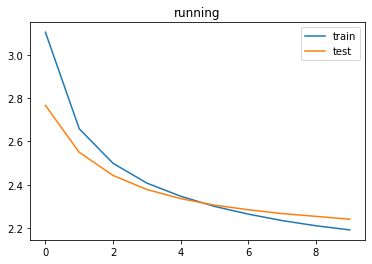

In [600]:
plt.title('running')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [601]:
!ls {checkpoint_dir}

checkpoint			  cp-0004.ckpt	cp-0010.ckpt  cp-0016.ckpt
cp-0000.ckpt.data-00000-of-00001  cp-0005.ckpt	cp-0011.ckpt  cp-0017.ckpt
cp-0000.ckpt.index		  cp-0006.ckpt	cp-0012.ckpt  cp-0018.ckpt
cp-0001.ckpt			  cp-0007.ckpt	cp-0013.ckpt  cp-0019.ckpt
cp-0002.ckpt			  cp-0008.ckpt	cp-0014.ckpt  cp-0020.ckpt
cp-0003.ckpt			  cp-0009.ckpt	cp-0015.ckpt


In [602]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_1/cp-0000.ckpt'

In [ ]:
# 새로운 모델 객체를 만듭니다
model = create_model()

# 이전에 저장한 가중치를 로드합니다
model.load_weights(latest)


In [ ]:
plt.title('loaded')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 수동으로 가중치 저장

In [ ]:
# 가중치를 저장합니다
model.save_weights('./checkpoints/my_checkpoint')

# 새로운 모델 객체를 만듭니다
model = create_model()

# 가중치를 복원합니다
model.load_weights('./checkpoints/my_checkpoint')

# 모델을 평가합니다
plt.title('not_auto_loaded')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
!mkdir -p saved_model
model.save('saved_model_prototype/my_model') 

In [ ]:
# my_model 디렉토리
!ls saved_model

# assests 폴더, saved_model.pb, variables 폴더
!ls saved_model_prototype/my_model

In [603]:
new_model = tf.keras.models.load_model('saved_model_prototype/my_model')

# 모델 구조를 확인합니다
new_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 128)      2176000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 60, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [604]:
model.save('review_summaization_new.h5')

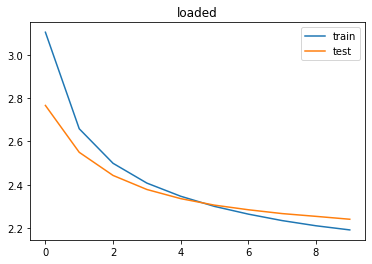

In [605]:
plt.title('loaded')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# seq2seq + attention으로 요약 모델 테스트

In [606]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [607]:
encoder_model = Model(encoder_inputs, [encoder_outputs, h_state, c_state])

In [611]:
encoder_h_state = Input(shape=(50,))
encoder_c_state = Input(shape=(50,))

pd_decoder_outputs, pd_h_state, pd_c_state = decoder_lstm(decoder_mask, initial_state=[encoder_h_state, encoder_c_state])

# 어텐션 구현부
# 2089는 시점 (단어, 패딩) 의 수, 50은 히든 스테이트의 차원
pd_encoder_outputs = Input(shape=(text_max_len, 50))
pd_attn_out, pd_attn_states = attn_layer([pd_encoder_outputs, pd_decoder_outputs])
pd_decoder_concat = Concatenate()([pd_decoder_outputs, pd_attn_out])

pd_decoder_softmax_outputs = decoder_dense(pd_decoder_concat)

decoder_model = Model([decoder_inputs, pd_encoder_outputs, encoder_h_state, encoder_c_state], [pd_decoder_softmax_outputs, pd_h_state, pd_c_state])

In [638]:
input_stc = input()
token_stc = input_stc.split()
encode_stc = tokenizer_re.texts_to_sequences([token_stc])
pad_stc = pad_sequences(encode_stc, maxlen=text_max_len, padding="post")

en_out, en_hidden, en_cell = encoder_model.predict(pad_stc)

predicted_seq = np.zeros((1,1))
predicted_seq[0, 0] = su_to_index['sostoken']

decoded_stc = []

while True:
    output_words, h, c = decoder_model.predict([predicted_seq, en_out, en_hidden, en_cell])

    predicted_word = index_to_su[np.argmax(output_words[0,0])]

    if predicted_word == 'eostoken':
        break

    decoded_stc.append(predicted_word)

    predicted_seq = np.zeros((1,1))
    predicted_seq[0, 0] = np.argmax(output_words[0, 0])

    en_hidden = h
    en_cell = c

print('\n')
print(' '.join(decoded_stc))

Working as intended. ran it around the baseboards across the room. Did this so i can have my tower by me but the t.v. on the other side without having a cable to trip over. More then enough length. Cable was stiff at first from being so thick and wound so tight. it didn't seem to do any damage though and works very well, sound and video is crisp and clear.


not better pumpkin


In [138]:
model.save('/content/gdrive/My Drive/capstone_design_yoon/')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/capstone_design_yoon/assets
